In [23]:
import sqlite3 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


PART 1

In [24]:
conn = sqlite3.connect("lahman2014.sqlite")

query = """
SELECT
    t.teamID,
    t.yearID,
    t.franchID,
    t.W AS wins,
    t.G AS games_played,
    COALESCE(s.total_payroll, 0) AS total_payroll,
    CASE
        WHEN t.G = 0 THEN NULL
        ELSE (t.W * 1.0 / t.G) * 100.0  -- Avoid integer division
    END AS winning_percentage
FROM
    Teams t
LEFT JOIN (
    SELECT
        teamID,
        yearID,
        SUM(salary) AS total_payroll
    FROM
        Salaries
    GROUP BY
        teamID,
        yearID
) s ON t.teamID = s.teamID AND t.yearID = s.yearID
"""

# Execute the query
results = conn.execute(query).fetchall()

# Print the first few rows of the results
for row in results:
    print(row)


print()
print()


query_2014 = """SELECT
    t.teamID,
    t.yearID,
    t.franchID,
    t.W AS wins,
    t.G AS games_played,
    COALESCE(s.total_payroll, 0) AS total_payroll,
    CASE
        WHEN t.G = 0 THEN NULL
        ELSE (t.W * 1.0 / t.G) * 100.0  -- Avoid integer division
    END AS winning_percentage
FROM
    Teams t
LEFT JOIN (
    SELECT
        teamID,
        yearID,
        SUM(salary) AS total_payroll
    FROM
        Salaries
    GROUP BY
        teamID,
        yearID
) s ON t.teamID = s.teamID AND t.yearID = s.yearID WHERE t.yearID == 2014 """

# only has the data form the 2014 season 
results = conn.execute(query_2014).fetchall()

for rows in results:
    print(rows)

years = pd.read_sql(query, conn)
data_2014 = years[years['yearID'] == 2014]
print(years)

conn.close()

('BS1', 1871, 'BNA', 20, 31, 0, 64.51612903225806)
('CH1', 1871, 'CNA', 19, 28, 0, 67.85714285714286)
('CL1', 1871, 'CFC', 10, 29, 0, 34.48275862068966)
('FW1', 1871, 'KEK', 7, 19, 0, 36.84210526315789)
('NY2', 1871, 'NNA', 16, 33, 0, 48.484848484848484)
('PH1', 1871, 'PNA', 21, 28, 0, 75.0)
('RC1', 1871, 'ROK', 4, 25, 0, 16.0)
('TRO', 1871, 'TRO', 13, 29, 0, 44.827586206896555)
('WS3', 1871, 'OLY', 15, 32, 0, 46.875)
('BL1', 1872, 'BLC', 35, 58, 0, 60.3448275862069)
('BR1', 1872, 'ECK', 3, 29, 0, 10.344827586206897)
('BR2', 1872, 'BRA', 9, 37, 0, 24.324324324324326)
('BS1', 1872, 'BNA', 39, 48, 0, 81.25)
('CL1', 1872, 'CFC', 6, 22, 0, 27.27272727272727)
('MID', 1872, 'MAN', 5, 24, 0, 20.833333333333336)
('NY2', 1872, 'NNA', 34, 56, 0, 60.71428571428571)
('PH1', 1872, 'PNA', 30, 47, 0, 63.829787234042556)
('TRO', 1872, 'TRO', 15, 25, 0, 60.0)
('WS3', 1872, 'OLY', 2, 9, 0, 22.22222222222222)
('WS4', 1872, 'NAT', 0, 11, 0, 0.0)
('BL1', 1873, 'BLC', 34, 57, 0, 59.64912280701754)
('BL4', 1

PART 2

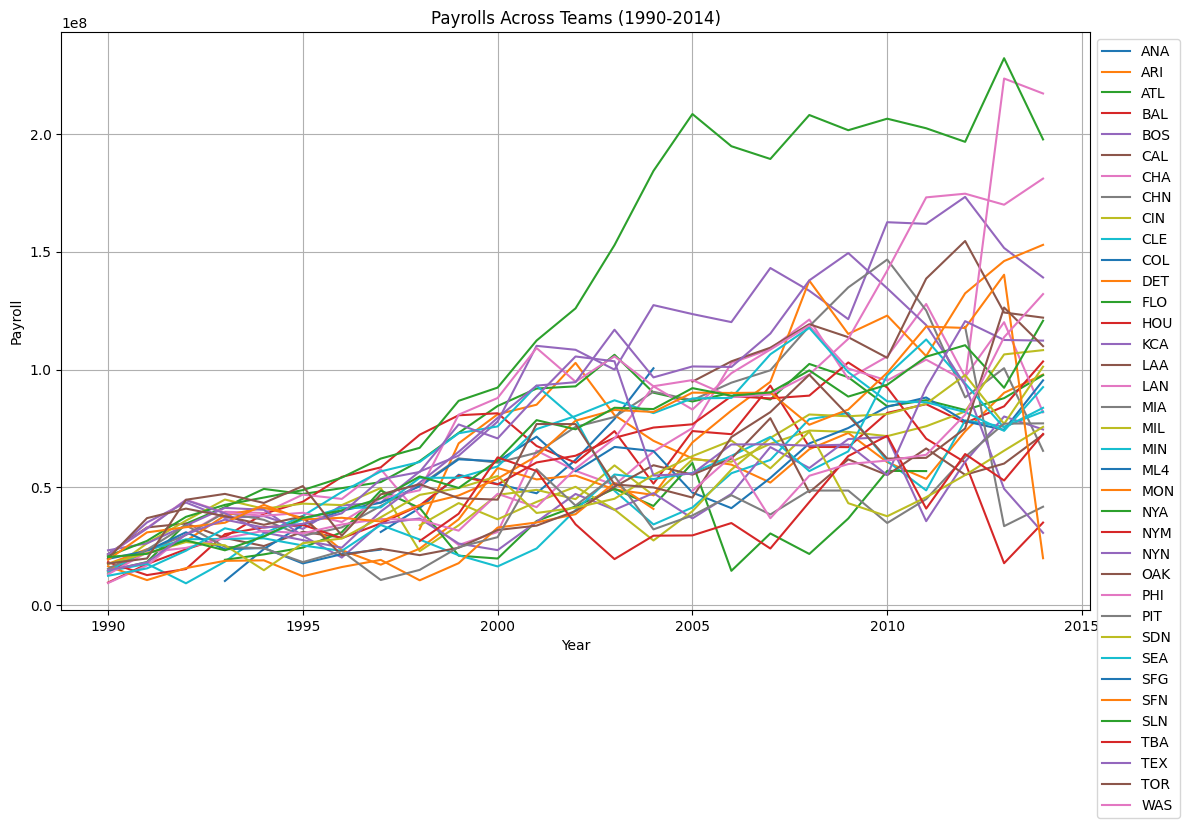

In [25]:
conn = sqlite3.connect("lahman2014.sqlite")

query_payrolls = """
SELECT
    teamID,
    yearID,
    sum(salary) as total_payroll
FROM
    Salaries
WHERE
    yearID BETWEEN 1990 AND 2014
GROUP BY
    teamID,
    yearID
"""

payrolls_data = pd.read_sql(query_payrolls, conn)

conn.close()

payrolls_pivot = payrolls_data.pivot(index='yearID', columns='teamID', values='total_payroll')

plt.figure(figsize=(12, 8))

for team in payrolls_pivot.columns:
    plt.plot(payrolls_pivot.index, payrolls_pivot[team], label=team)

plt.xlabel('Year')
plt.ylabel('Payroll')
plt.title('Payrolls Across Teams (1990-2014)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('payrolls_across_teams.png')
plt.show()


PART 3